In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [198]:
path = "Analysis of Super Store - DA.csv"

In [199]:
df = pd.read_csv(path)

In [200]:
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [201]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [202]:
df.drop(columns = ["Postal Code","Country"],axis = 1, inplace = True)

In [203]:
cols = []
for x in df.columns:
  if(df[x].dtypes=="float64"):
    cols.append(x)

print(cols)

['Sales', 'Discount', 'Profit']


FINDING CORRELATION

In [204]:
dfx = df.copy()

In [205]:
label_encoder = LabelEncoder()

In [206]:
for column in dfx.columns:
    if dfx[column].dtype == 'object':
        dfx[column] = label_encoder.fit_transform(df[column])


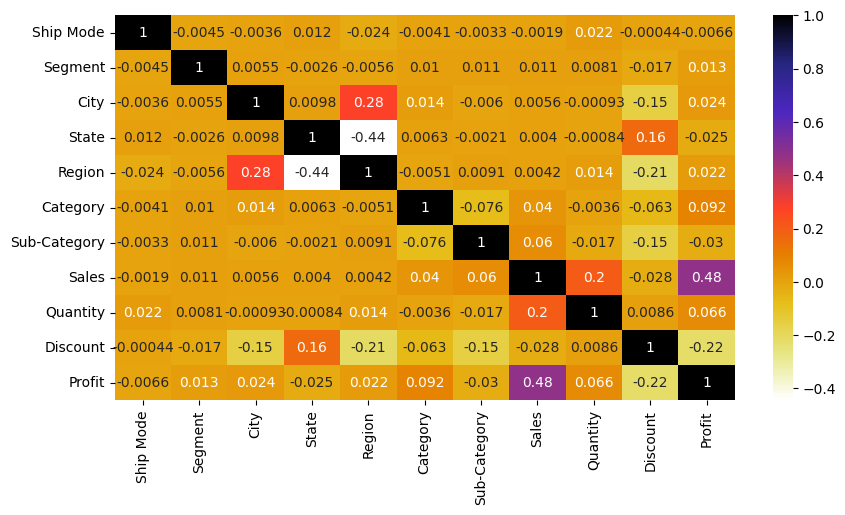

In [207]:
plt.figure(figsize=(10,5))
cor = dfx.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

END OF CORRELATION


In [208]:
test = df.groupby("Region").sum()
test

<ipython-input-208-ff99195a7127>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Sales,Quantity,Discount,Profit
Region,,,,
Central,501239.8908,8780,558.34,39706.3625
East,678781.2400,10618,414.00,91522.7800
South,391721.9050,6209,238.55,46749.4303
West,725457.8245,12266,350.20,108418.4489


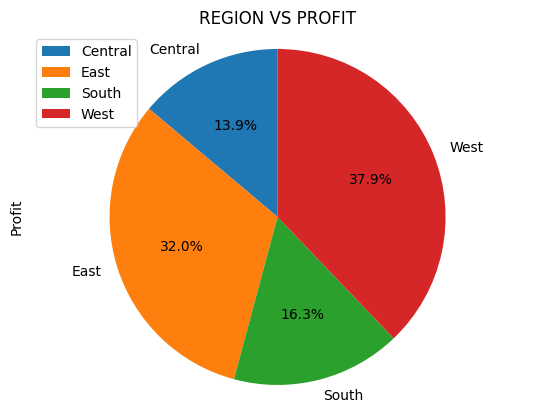

In [209]:
test.plot.pie(y='Profit', labels=test.index, autopct='%1.1f%%', startangle=90)
plt.title('REGION VS PROFIT')
plt.axis('equal')
plt.show()

<ipython-input-210-fe1c3d438fac>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



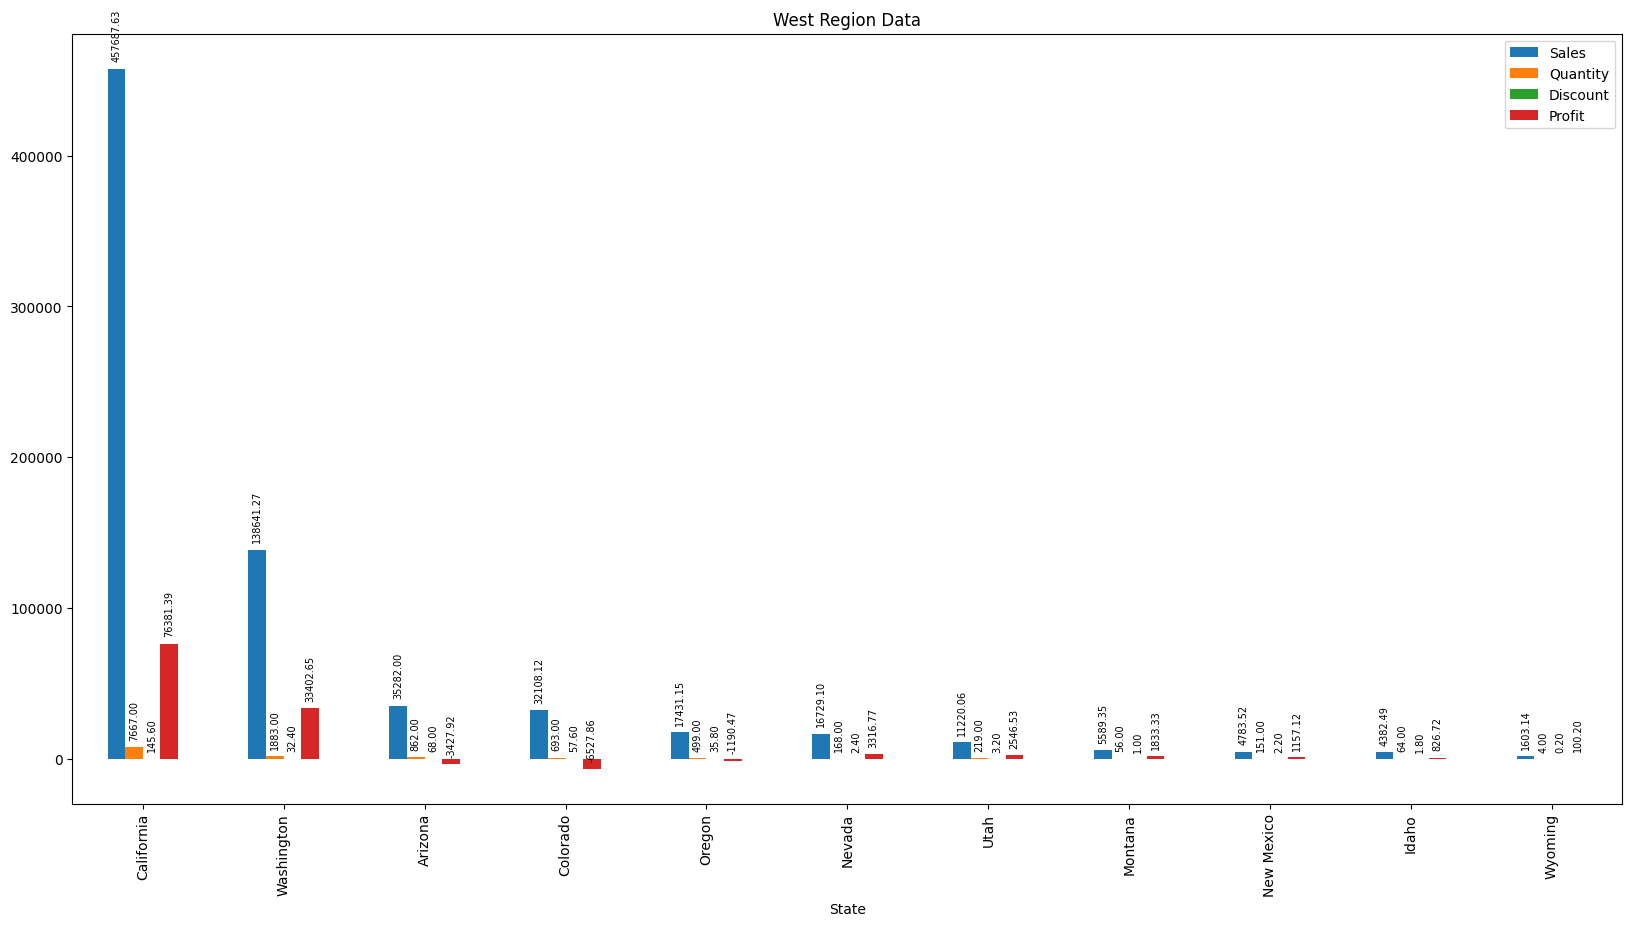

In [210]:
ax = df[df["Region"] == "West"].groupby("State").sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", figsize = (20,10), title = "West Region Data")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=7 ,color='black', xytext=(0, 5),
                textcoords='offset points', rotation=90)

In [87]:
df_loc = pd.read_csv(r'/content/drive/MyDrive/IBM INTERSHIP/state_market_tracker.tsv000', sep='\t')
df_loc=df_loc[['period_begin','state','state_code','property_type','median_sale_price']]
df_loc=df_loc[(df_loc['period_begin']=='2022-01-01') & (df_loc['property_type']=='Single Family Residential')]
df_loc.rename({'median_sale_price':'Median Sales Price ($)'},axis=1, inplace=True)
mydata = {}
for x,y in zip(df_loc["state"], df_loc["state_code"]):
  mydata[x] = y

<ipython-input-87-7203a4e4757a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
mydata["North Dakota"] = "ND"
mydata["Wyoming"] = "WY"

In [99]:
loc

,State,Profit,Sales,code
0,Alabama,5786.8253,19510.6400,AL
1,Arizona,-3427.9246,35282.0010,AZ
2,Arkansas,4008.6871,11678.1300,AR
3,California,76381.3871,457687.6315,CA
4,Colorado,-6527.8579,32108.1180,CO
5,Connecticut,3511.4918,13384.3570,CT
6,Delaware,9977.3748,27451.0690,DE
7,Columbia,1059.5893,2865.0200,DC
8,Florida,-3399.3017,89473.7080,FL
9,Georgia,16250.0433,49095.8400,GA


In [96]:
loc = df.groupby("State").sum()[["Sales", "Profit"]]
loc = loc.reset_index()[["State","Profit","Sales"]]

<ipython-input-96-b4bc34891b61>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [97]:
loc["State"]  = loc["State"].replace("District of Columbia","Columbia")
loc["code"] = loc["State"].apply(lambda x: mydata[x])

In [166]:
fig = px.choropleth(loc,
                    locations='code',
                    locationmode="USA-states",
                    scope="usa",
                    color='Profit',
                    color_continuous_scale="Viridis_r",
                    hover_name='State',
)
fig.update_layout(title='PROFIT DATA STATE WISE')


fig.show()

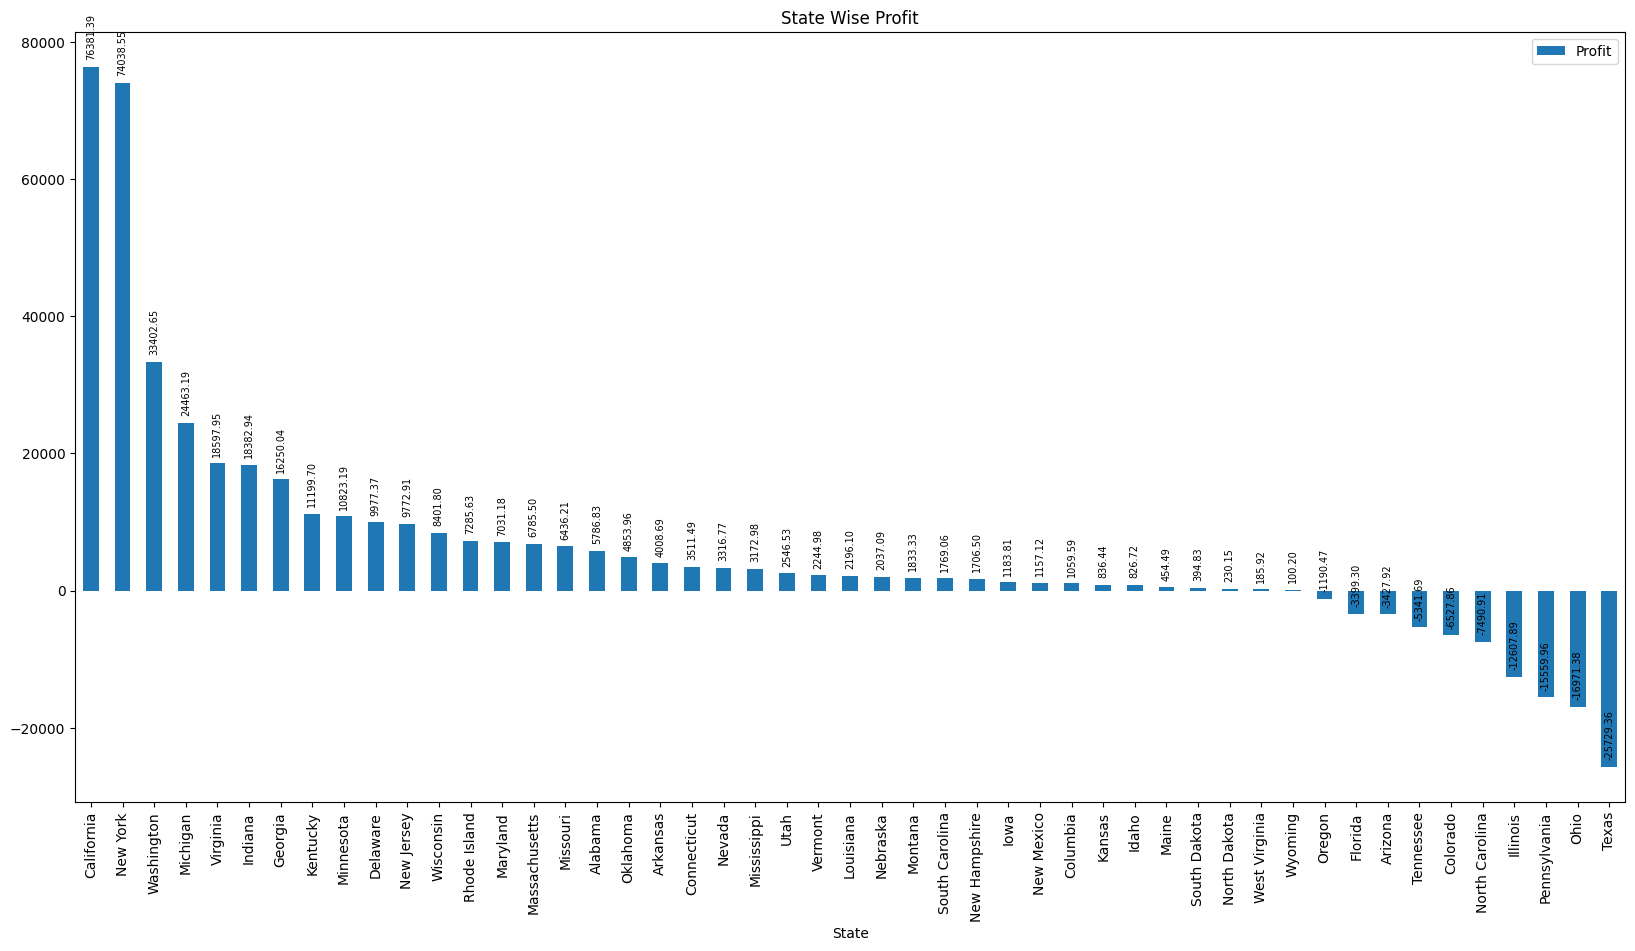

In [128]:
ax = loc.sort_values("Profit", ascending = False).plot(y = "Profit",x = "State", kind = "bar", figsize = (20,10),title = "State Wise Profit")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=7 ,color='black', xytext=(0, 5),
                textcoords='offset points', rotation=90)

In [100]:
import plotly.express as px

fig = px.choropleth(loc,
                    locations='code',
                    locationmode="USA-states",
                    scope="usa",
                    color='Sales',
                    color_continuous_scale="Viridis_r",
                    hover_name='State',
)
fig.update_layout(title='Sales DATA')


fig.show()

In [25]:
from geopy.geocoders import Nominatim

count = 0

def coordinates(name):
  global count

  count+=1
  print(count)



  geolocator = Nominatim(user_agent="city_code_lookup")


  city_name = str(name)
  country = "United States"


  location = geolocator.geocode(f"{city_name}, {country}")

  if location:
      return [location.latitude, location.longitude]
      # print("City Name:", location.address)
      # print("City Code:", location.raw.get("osm_id"))
      # print("Latitude:", location.latitude)
      # print("Longitude:", location.longitude)
  else:
      print("City not found.")
      return np.nan


In [26]:
df_codd = df.copy()

In [27]:
df_codd["lon"] = df_codd["City"].apply(lambda x: coordinates(x) )

In [28]:
df_codd.to_csv('data.csv', index=False)

In [129]:
df_codd = pd.read_csv("/content/drive/MyDrive/IBM INTERSHIP/data (4).csv")

In [130]:
df_codd

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,lon
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,"[32.182598, -95.7893178]"
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,"[32.182598, -95.7893178]"
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,"[34.0536909, -118.242766]"
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,"[26.1223084, -80.1433786]"
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,"[26.1223084, -80.1433786]"
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,"[25.7741728, -80.19362]"
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,"[33.6633386, -117.903317]"
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,"[33.6633386, -117.903317]"
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,"[33.6633386, -117.903317]"


In [160]:
df_codd["lonx"] = df_codd["lon"].apply(lambda x: float(x.split(",")[0][1:]))
df_codd["latx"]= df_codd["lon"].apply(lambda x: float(x.split(",")[1][:-1]))


df_codd["lon"].apply(lambda x: float(x.split(",")[0][1:]))

In [161]:
df_codd

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,lon,lonx,latx
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,"[32.182598, -95.7893178]",32.182598,-95.789318
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,"[32.182598, -95.7893178]",32.182598,-95.789318
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,"[34.0536909, -118.242766]",34.053691,-118.242766
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,"[26.1223084, -80.1433786]",26.122308,-80.143379
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,"[26.1223084, -80.1433786]",26.122308,-80.143379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,"[25.7741728, -80.19362]",25.774173,-80.193620
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,"[33.6633386, -117.903317]",33.663339,-117.903317
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,"[33.6633386, -117.903317]",33.663339,-117.903317
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,"[33.6633386, -117.903317]",33.663339,-117.903317


In [163]:
fig = px.scatter_mapbox(df_codd, lat='lonx', lon='latx',
                        hover_name='Profit', hover_data=['Profit'],
                        color='Profit', color_continuous_scale='Viridis',
                        mapbox_style='carto-positron', zoom=3, title='Profit City Wise')

fig.show()


In [165]:
fig = px.scatter_mapbox(df_codd, lat='lonx', lon='latx',
                        hover_name='Sales', hover_data=['Sales'],
                        color='Sales', color_continuous_scale='Viridis',
                        mapbox_style='carto-positron', zoom=3, title='SALES CITY WISE')

fig.show()

<ipython-input-167-cf4df780e649>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: title={'center': 'STATE'}, xlabel='State'>

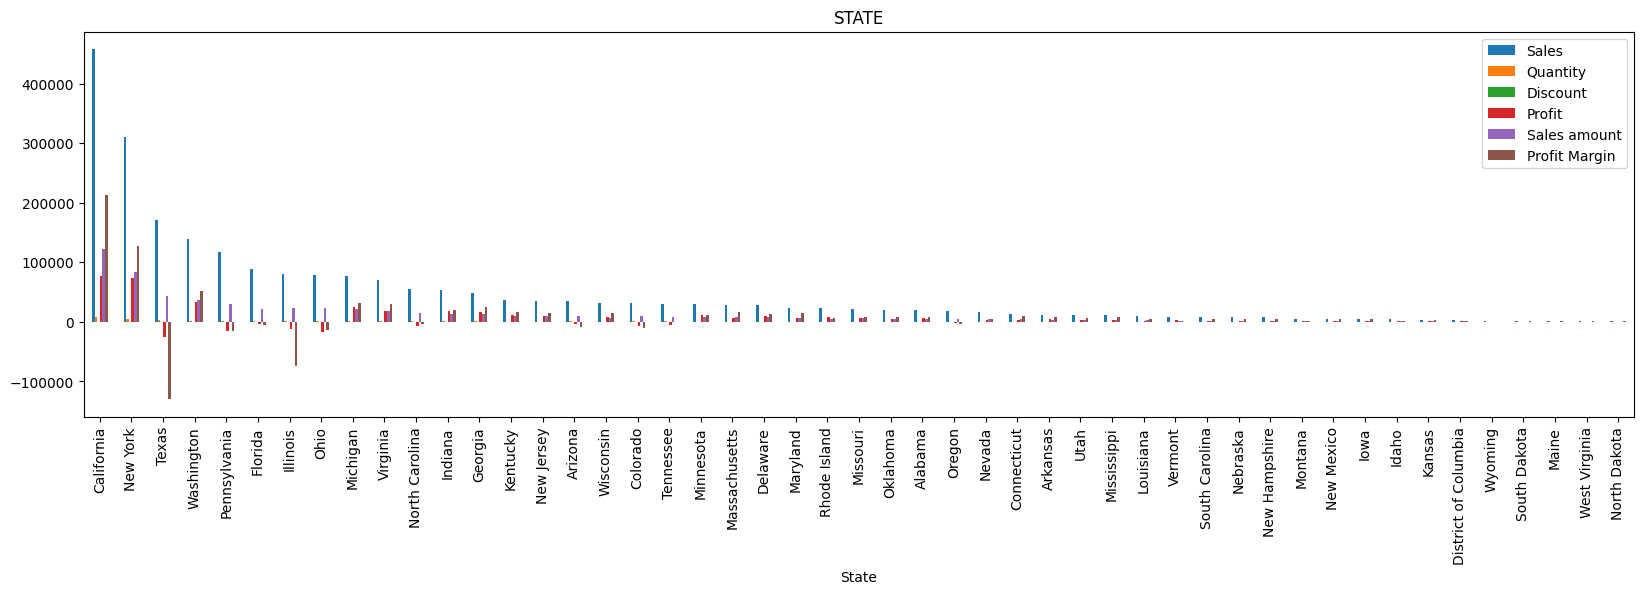

In [167]:
df.groupby("State").sum().sort_values(by = "Sales", ascending  = False).plot(kind = "bar", figsize = (20,5), title ="STATE")

<ipython-input-30-02ccb5c3c855>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: ylabel='Sales'>

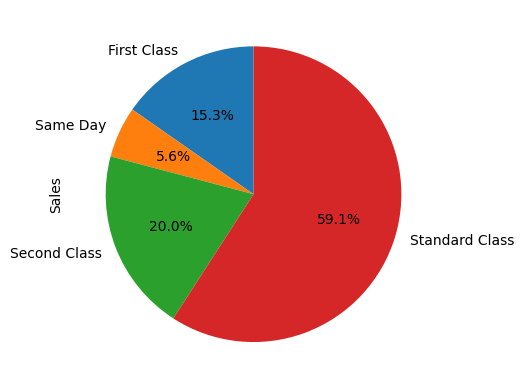

In [30]:
df.groupby("Ship Mode").sum()["Sales"].plot(kind = "pie" , autopct='%1.1f%%', startangle=90)

<ipython-input-212-dc1dc1ff8b62>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



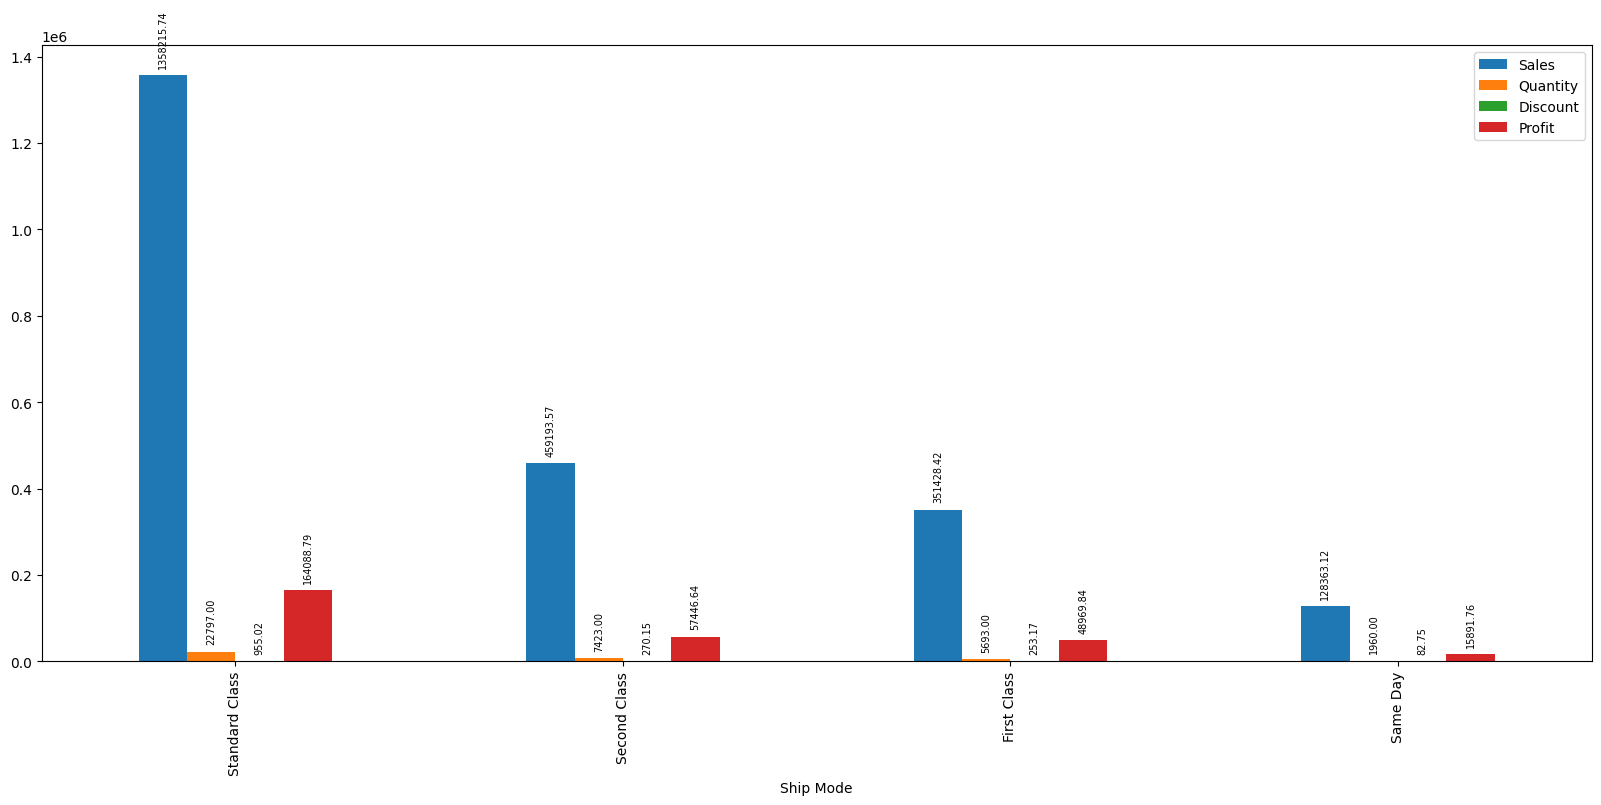

In [212]:
ax = df.groupby("Ship Mode").sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", figsize = (20,8))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=7 ,color='black', xytext=(0, 5),
                textcoords='offset points', rotation=90)

In [32]:
df["Sales amount"] = df["Sales"] / df["Quantity"]

In [33]:
df["Profit Margin"] = (df["Profit"]/df["Sales amount"])*100

<ipython-input-34-cdf6ce3f399a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



<Axes: title={'center': 'Profit Margin OF Category'}, ylabel='Profit Margin'>

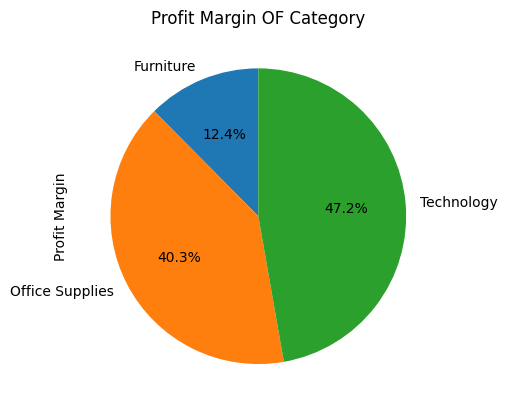

In [34]:
df.groupby("Category").mean()["Profit Margin"].plot(kind = "pie",  autopct='%1.1f%%', startangle=90, title = 'Profit Margin OF Category')

<ipython-input-48-b7d662112ab1>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



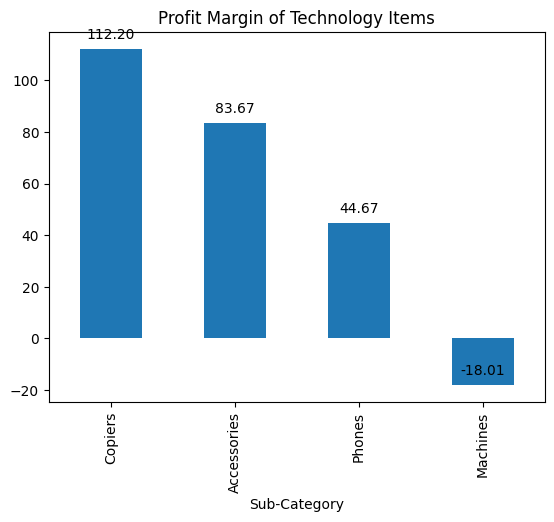

In [48]:
ax =  df[df["Category"]=="Technology"].groupby("Sub-Category").mean().sort_values(by = "Profit Margin", ascending = False)["Profit Margin"].plot(kind = "bar" , title = "Profit Margin of Technology Items")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')



<ipython-input-53-5acd05291beb>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



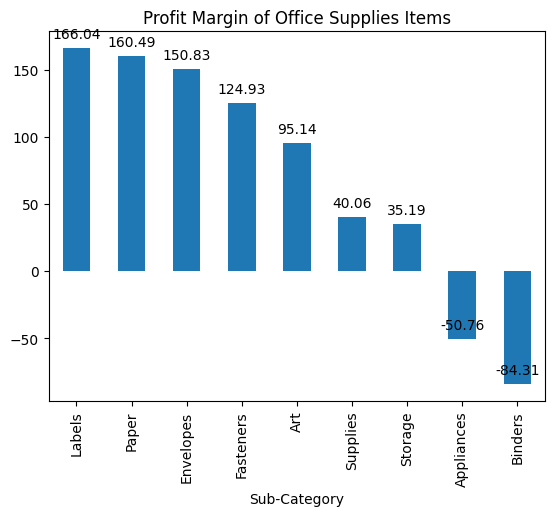

In [53]:
ax = df[df["Category"]=="Office Supplies"].groupby("Sub-Category").mean().sort_values(by = "Profit Margin", ascending = False)["Profit Margin"].plot(kind = "bar" , title = "Profit Margin of Office Supplies Items")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


<ipython-input-52-893373dad04a>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



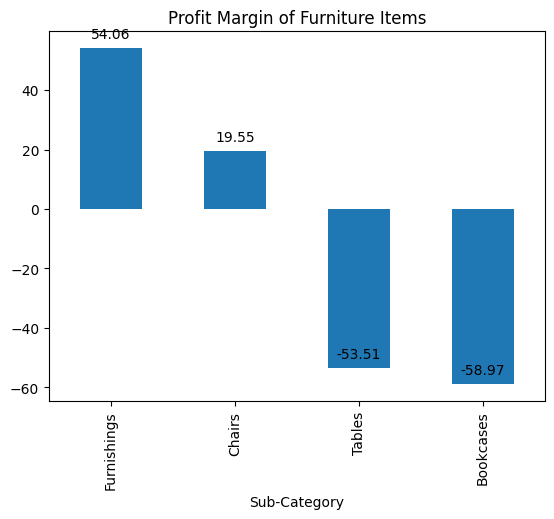

In [52]:
ax = df[df["Category"]=="Furniture"].groupby("Sub-Category").mean().sort_values(by = "Profit Margin", ascending = False)["Profit Margin"].plot(kind = "bar" , title = "Profit Margin of Furniture Items")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


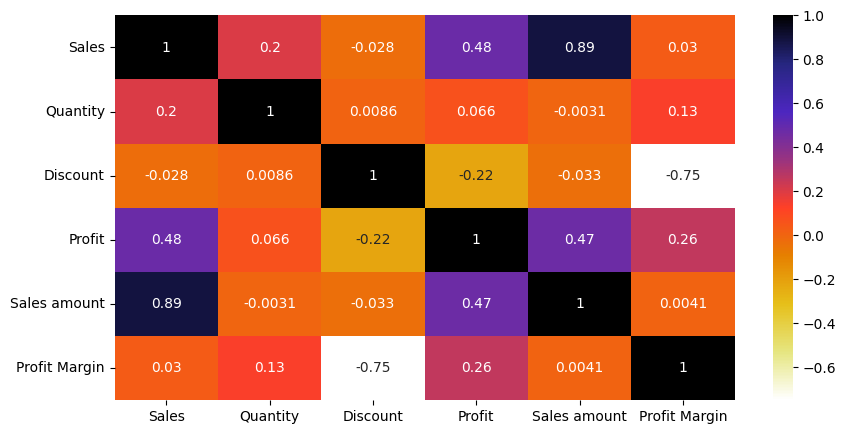

In [38]:
plt.figure(figsize=(10,5))
cor = df[['Sales', 'Quantity', 'Discount', 'Profit','Sales amount', 'Profit Margin']].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

<ipython-input-171-5d33d3c79d50>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



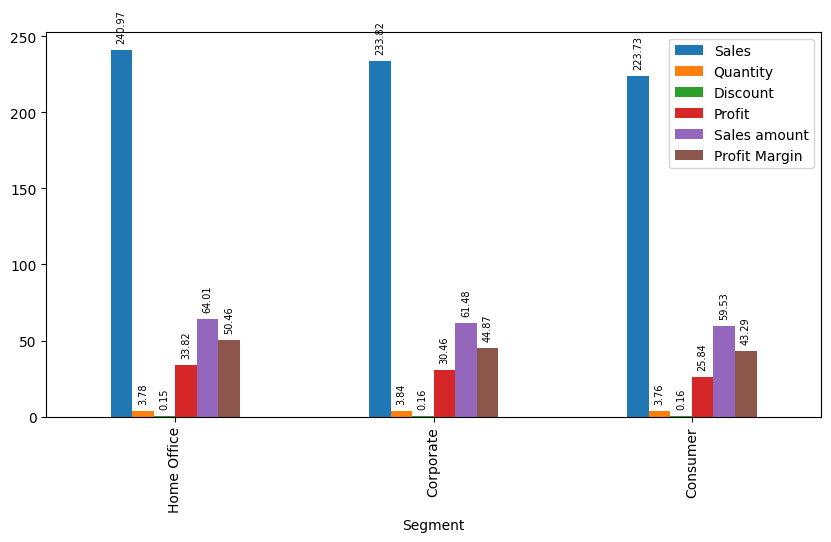

In [171]:
ax = df.groupby("Segment").mean().sort_values(by = "Profit", ascending = False).plot(kind = "bar", figsize = (10,5))
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points', rotation = 90)

<ipython-input-184-44f2aa67c244>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



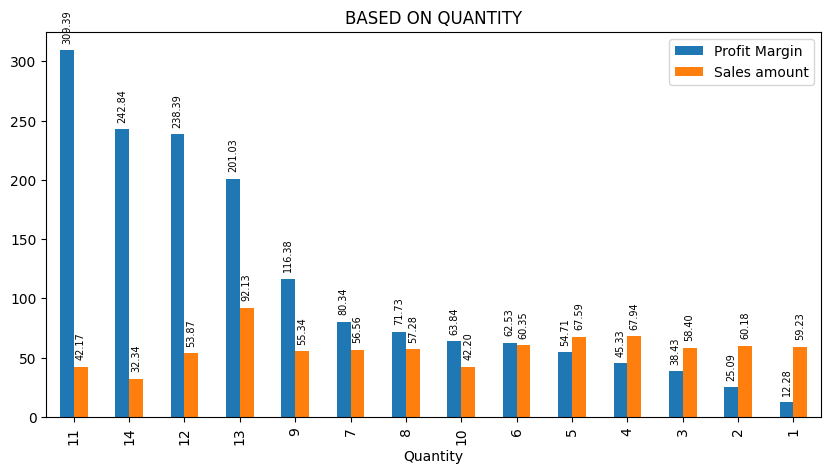

In [184]:
ax = df.groupby("Quantity").mean()[["Profit Margin","Sales amount"]].sort_values(by ="Profit Margin", ascending =False).plot(kind = "bar" , figsize = (10,5) , title = "BASED ON QUANTITY")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=7, color='black', xytext=(0, 5),
                textcoords='offset points', rotation = 90)